# Lab 5: Introducing Classification

Objectives:
- To gain hands-on experience classifying small dataset
- To implement concepts related to Decision Tree classifier (i.e. Entropy, Information Gain), along with using existing libraries.

In [ ]:
# # Run this cell if you use Colab
# from google.colab import drive
# drive.mount('/content/drive')

### Code it yourself

In [2]:
import pandas as pd

# Read the data
df = pd.read_csv('./sources/toy_data.csv')
df

,age,income,student,credit rating,buys computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14 non-null     object
 1   income         14 non-null     object
 2   student        14 non-null     object
 3   credit rating  14 non-null     object
 4   buys computer  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes
None


**TODO:** Write functions to compute Gain and Entropy, as discussed in the lecture.

In [4]:
import numpy as np

In [5]:
def EntropyCalc(df):
    total_count = df['yes'] + df['no']

    prob_yes = df['yes'] / total_count
    prob_no = df['no'] / total_count

    entropy = 0
    if ( prob_yes > 0 ) :
        entropy -= prob_yes * np.log2(prob_yes)
    if ( prob_no > 0 ) :
        entropy -= prob_no * np.log2(prob_no)
    
    return entropy

In [6]:
def Weighted_EntropyCalc(df , total_target_count):
    total_count = df['yes'] + df['no']

    weighted_ratio = total_count / total_target_count

    entropy = df['Entropy']

    return weighted_ratio * entropy

In [7]:
#Target Entropy
target_df = df['buys computer'].value_counts()
target_entropy = EntropyCalc(target_df)
target_entropy

np.float64(0.9402859586706311)

In [16]:
def compute_information_gain(df, attribute, target, target_entropy, entropy_func, weighted_entropy_func):
    attr_df = df.groupby(attribute)[target].value_counts().unstack(fill_value=0).reset_index()
    
    for i in range(len(attr_df)):
        attr_df.loc[i, 'Entropy'] = entropy_func(attr_df.loc[i])
        attr_df.loc[i, 'Weighted'] = weighted_entropy_func(attr_df.loc[i], len(df))
    
    return target_entropy - attr_df['Weighted'].sum()

In [17]:
age_ig = compute_information_gain(df, 'age', 'buys computer', target_entropy, EntropyCalc, Weighted_EntropyCalc)
income_ig = compute_information_gain(df, 'income', 'buys computer', target_entropy, EntropyCalc, Weighted_EntropyCalc)
student_ig = compute_information_gain(df, 'student', 'buys computer', target_entropy, EntropyCalc, Weighted_EntropyCalc)
credit_rating_ig = compute_information_gain(df, 'credit rating', 'buys computer', target_entropy, EntropyCalc, Weighted_EntropyCalc)

print(f'Information Gain of "age" >> {age_ig}')
print(f'Information Gain of "income" >> {income_ig}')
print(f'Information Gain of "student" >> {student_ig}')
print(f'Information Gain of "credit rating" >> {credit_rating_ig}')

Information Gain of "age" >> 0.24674981977443933
Information Gain of "income" >> 0.02922256565895487
Information Gain of "student" >> 0.15183550136234159
Information Gain of "credit rating" >> 0.04812703040826949


___

### Using Libraries

Now that you know how to compute these values by yourselfs, now let's use some libraries.

**Steps:**
- Split the Data → Divide dataset into training (80%) and testing (20%).
- Train the Model → Fit a Decision Tree using the training data.
- Test the Model → Use the trained model to predict on test data.
- Evaluate Performance → Compare predictions with actual values (e.g., Accuracy Score).

Prepare features and labels.

In [12]:
# Features
features = df.drop('buys computer', axis=1)  
features

# Alternatively, you can use this:
# features = df.iloc[:, :-1]

,age,income,student,credit rating
0,<=30,high,no,fair
1,<=30,high,no,excellent
2,31-40,high,no,fair
3,>40,medium,no,fair
4,>40,low,yes,fair
5,>40,low,yes,excellent
6,31-40,low,yes,excellent
7,<=30,medium,no,fair
8,<=30,low,yes,fair
9,>40,medium,yes,fair


In [13]:
# Labels (or Target)
labels = df['buys computer']  
labels

# # Alternatively, you can use this:
# labels = df.iloc[:, [-1]]

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: buys computer, dtype: object

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [15]:
# 1. Load the dataset
X = features.values  # Features
y = labels.values  # Target labels

# 2. Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train a Decision Tree model with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: '31-40'

There's an error:

**ValueError: could not convert string to float: '31-40'**

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding for all categorical columns
df['age'] = label_encoder.fit_transform(df['age'])
df['income'] = label_encoder.fit_transform(df['income'])
df['student'] = label_encoder.fit_transform(df['student'])
df['credit rating'] = label_encoder.fit_transform(df['credit rating'])
df['buys computer'] = label_encoder.fit_transform(df['buys computer'])

# Display the encoded DataFrame
print(df)

    age  income  student  credit rating  buys computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


Let's check out an updated dataframe.

In [19]:
df

,age,income,student,credit rating,buys computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,2,2,1,1,1


In [20]:
X = df.drop('buys computer', axis=1)  # Features
y = df['buys computer']  # Target

Let's continue where we left off!

In [21]:
# 2. Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train a Decision Tree model with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)

(11, 4)
(3, 4)


Now we're going build the Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)  # Using 'entropy' as the criterion

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


And evaluate our model.

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]


And visualize our tree!

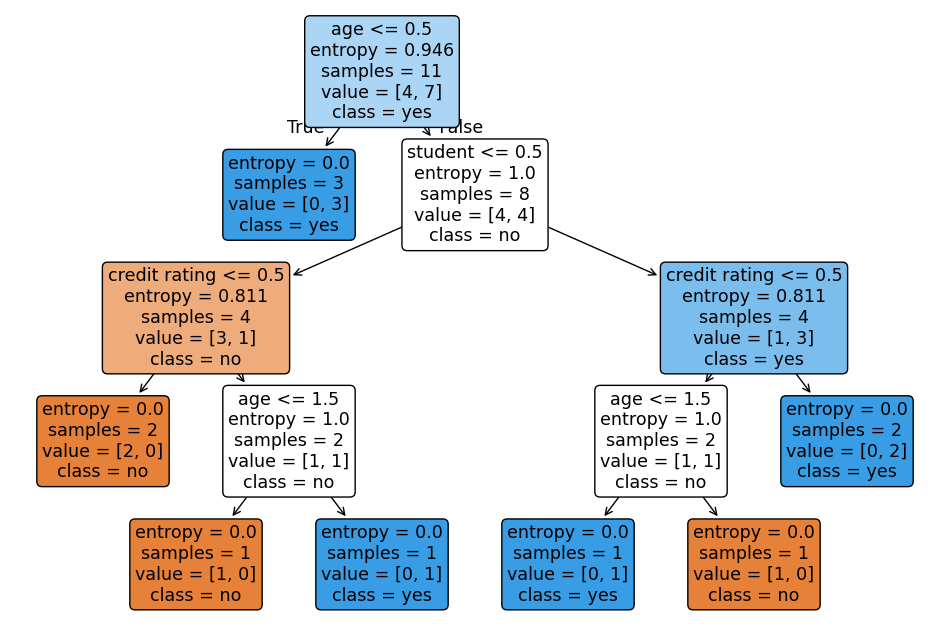

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

Put them all together.

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]


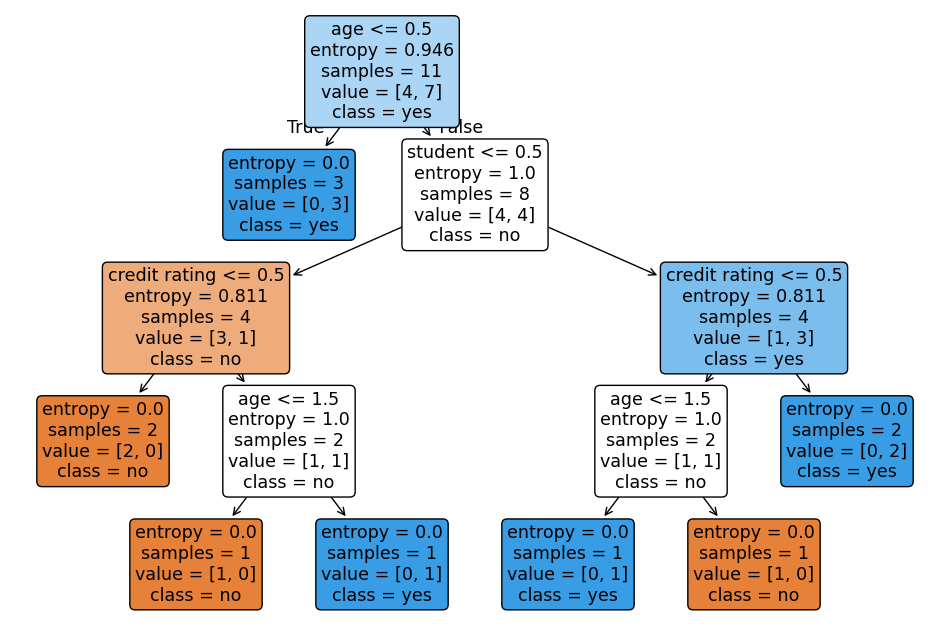

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# data
data = pd.read_csv('sources/toy_data.csv')

df = pd.DataFrame(data)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['income'] = label_encoder.fit_transform(df['income'])
df['student'] = label_encoder.fit_transform(df['student'])
df['credit rating'] = label_encoder.fit_transform(df['credit rating'])
df['buys computer'] = label_encoder.fit_transform(df['buys computer'])

# Separate features (X) and target (y)
X = df.drop('buys computer', axis=1)
y = df['buys computer']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()


Is the output tree the same as what you calculated yourself? Explain in your own words why they are the same or different.

**Ans:** The entropy and information gain are not the same since the model use only 80% of the dataset (11 samples), while hand calculated use 100 % of the dataset (14 samples)

___

Another example, another dataset -- Iris

Model Accuracy: 1.00


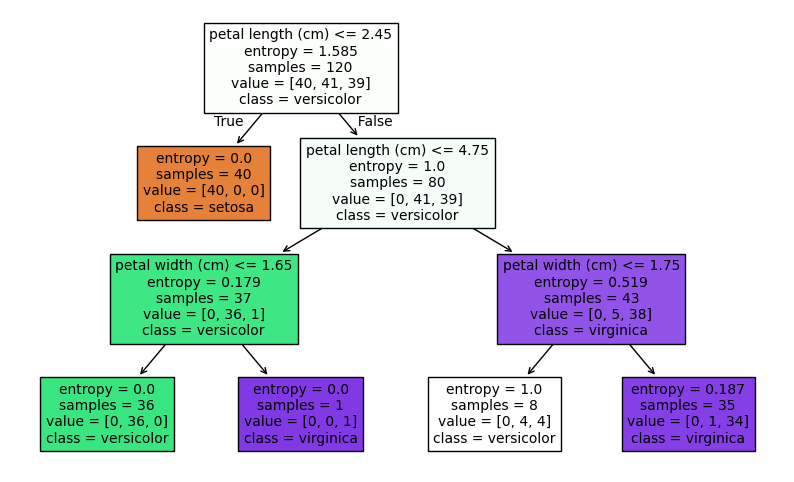

In [27]:
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# 2. Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train a Decision Tree model with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = clf.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# 6. Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
